In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
import tensorflow as tf

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [5]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [6]:
K = len(set(y_train))# number of classes

In [7]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
#x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
#x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.5243 - accuracy: 0.8061 - val_loss: 0.4123 - val_accuracy: 0.8456
Epoch 2/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3616 - accuracy: 0.8642 - val_loss: 0.3456 - val_accuracy: 0.8751
Epoch 3/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3127 - accuracy: 0.8827 - val_loss: 0.3379 - val_accuracy: 0.8754
Epoch 4/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2810 - accuracy: 0.8935 - val_loss: 0.3214 - val_accuracy: 0.8820
Epoch 5/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2555 - accuracy: 0.9044 - val_loss: 0.3258 - val_accuracy: 0.8812
Epoch 6/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2323 - accuracy: 0.9119 - val_loss: 0.3189 - val_accuracy: 0.8867
Epoch 7/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2175 - accuracy: 0.9168 - val_loss: 0.2991 -

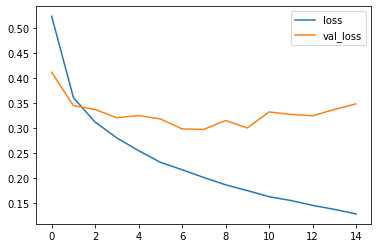

In [9]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

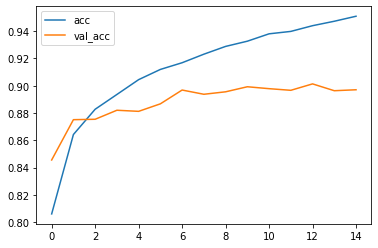

In [10]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()